In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lethbridge
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | caceres
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | batemans bay
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | dunbar
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | mayo
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | luanda
Processing Record 20 of Set 1 | tarko-sale
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | grand gaube
Processing Record 23 of Set 1 | westport
Processing

Processing Record 44 of Set 4 | heihe
Processing Record 45 of Set 4 | trairi
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | sinnamary
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | gravelbourg
Processing Record 2 of Set 5 | lozova
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | bella union
Processing Record 6 of Set 5 | utiroa
City not found. Skipping...
Processing Record 7 of Set 5 | thompson
Processing Record 8 of Set 5 | eureka
Processing Record 9 of Set 5 | hambantota
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | porbandar
Processing Record 12 of Set 5 | bosaso
Processing Record 13 of Set 5 | half moon bay
Processing Record 14 of Set 5 | puerto ayora
Processing Record 15 of Set 5 | brae
Processing Record 16 of Set 5 | khatan

Processing Record 33 of Set 8 | roald
Processing Record 34 of Set 8 | mahaicony
City not found. Skipping...
Processing Record 35 of Set 8 | cayenne
Processing Record 36 of Set 8 | shubarshi
Processing Record 37 of Set 8 | barbar
City not found. Skipping...
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | ozinki
Processing Record 40 of Set 8 | kijang
Processing Record 41 of Set 8 | komsomolskiy
Processing Record 42 of Set 8 | ahipara
Processing Record 43 of Set 8 | fukue
Processing Record 44 of Set 8 | careiro da varzea
Processing Record 45 of Set 8 | portland
Processing Record 46 of Set 8 | pangkalanbuun
Processing Record 47 of Set 8 | buritizeiro
Processing Record 48 of Set 8 | tammisaari
Processing Record 49 of Set 8 | egvekinot
Processing Record 50 of Set 8 | temaraia
City not found. Skipping...
Processing Record 1 of Set 9 | ostrovnoy
Processing Record 2 of Set 9 | porto novo
Processing Record 3 of Set 9 | huarmey
Processing Record 4 of Set 9 | bolshaya chernig

Processing Record 18 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 19 of Set 12 | sarai
Processing Record 20 of Set 12 | vanimo
Processing Record 21 of Set 12 | ovalle
Processing Record 22 of Set 12 | mount isa
Processing Record 23 of Set 12 | srikakulam
Processing Record 24 of Set 12 | puruaran
Processing Record 25 of Set 12 | adrar
Processing Record 26 of Set 12 | raudeberg
Processing Record 27 of Set 12 | kencong
Processing Record 28 of Set 12 | clovis
Processing Record 29 of Set 12 | salalah
Processing Record 30 of Set 12 | chor
Processing Record 31 of Set 12 | waipawa
Processing Record 32 of Set 12 | kaka
Processing Record 33 of Set 12 | kanniyakumari
Processing Record 34 of Set 12 | hokitika
Processing Record 35 of Set 12 | meyungs
City not found. Skipping...
Processing Record 36 of Set 12 | barra
Processing Record 37 of Set 12 | thessalon
Processing Record 38 of Set 12 | hobyo
Processing Record 39 of Set 12 | dum duma
Processing Record 40 of Set 12 |

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lethbridge,49.7000,-112.8186,89.11,24,100,5.01,CA,2021-08-07 01:02:13
1,Kapaa,22.0752,-159.3190,85.98,77,12,4.00,US,2021-08-07 01:02:24
2,New Norfolk,-42.7826,147.0587,47.91,78,99,5.01,AU,2021-08-07 01:02:24
3,Caceres,39.5220,-6.3748,62.80,70,6,9.46,ES,2021-08-07 01:02:25
4,Hobart,-42.8794,147.3294,48.25,84,75,19.57,AU,2021-08-07 01:02:25
5,Bredasdorp,-34.5322,20.0403,49.28,93,0,3.47,ZA,2021-08-07 01:02:25
6,Batemans Bay,-35.7167,150.1833,60.10,55,34,2.80,AU,2021-08-07 01:02:26
7,Rikitea,-23.1203,-134.9692,74.77,75,8,12.68,PF,2021-08-07 00:57:31
8,Lebu,-37.6167,-73.6500,50.43,90,100,3.38,CL,2021-08-07 01:02:26
9,Dunbar,38.3606,-81.7374,77.65,86,100,1.79,US,2021-08-07 01:02:26


In [30]:
new_column_order = ["City" , "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)



,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lethbridge,CA,2021-08-07 01:02:13,49.7000,-112.8186,89.11,24,100,5.01
1,Kapaa,US,2021-08-07 01:02:24,22.0752,-159.3190,85.98,77,12,4.00
2,New Norfolk,AU,2021-08-07 01:02:24,-42.7826,147.0587,47.91,78,99,5.01
3,Caceres,ES,2021-08-07 01:02:25,39.5220,-6.3748,62.80,70,6,9.46
4,Hobart,AU,2021-08-07 01:02:25,-42.8794,147.3294,48.25,84,75,19.57
5,Bredasdorp,ZA,2021-08-07 01:02:25,-34.5322,20.0403,49.28,93,0,3.47
6,Batemans Bay,AU,2021-08-07 01:02:26,-35.7167,150.1833,60.10,55,34,2.80
7,Rikitea,PF,2021-08-07 00:57:31,-23.1203,-134.9692,74.77,75,8,12.68
8,Lebu,CL,2021-08-07 01:02:26,-37.6167,-73.6500,50.43,90,100,3.38
9,Dunbar,US,2021-08-07 01:02:26,38.3606,-81.7374,77.65,86,100,1.79


In [31]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

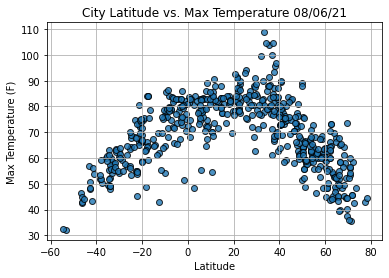

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

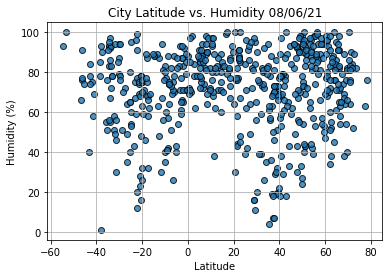

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

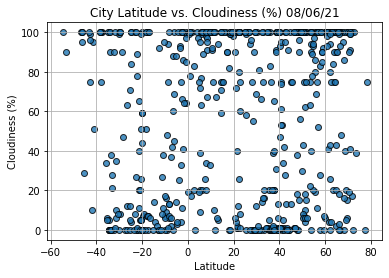

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

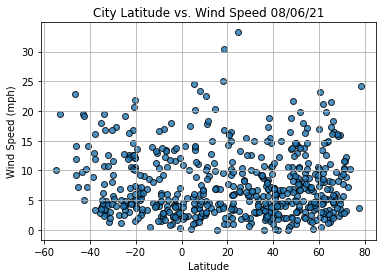

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()